# EDA on Gas Price Data

In [1]:
import pandas as pd

In [43]:
df = pd.read_pickle('master_df.pkl')
df.sample(5).transpose()

,10215,8139,3191,1335,7082
names,Shell,Esso,Domo,Petro-Canada,Chevron
price,153.9,158.9,129.9,124.9,147.9
time_ago,8 hours,18 hours,15 hours,10 hours,3 hours
address,"2148 Sooke Rd Colwood, BC","1205 Burrard StVancouver, BC","9255 34th AveEdmonton, AB","6655 178th StEdmonton, AB","2918 KingswayVancouver, BC"
time_scraped,2018-10-04 06:04:47,2018-10-11 12:04:19,2018-10-10 12:47:44,2018-10-02 12:03:15,2018-10-02 06:04:18
area_name,victoria,vancouver,edmonton,edmonton,vancouver
lat,48.4366,49.2791,53.4653,53.5015,49.2361
lng,-123.488,-123.13,-113.474,-113.629,-123.046
date,2018-10-04 00:00:00,2018-10-11 00:00:00,2018-10-10 00:00:00,2018-10-02 00:00:00,2018-10-02 00:00:00
city_name,victoria,vancouver,edmonton,edmonton,vancouver


In [3]:
df.describe()

,price,lat,lng,precip,min_temp,max_temp,clouds,max_wind_spd,snow,time_diff,margin,rack
count,20353.000000,20353.000000,20353.000000,20353.000000,20353.000000,20353.000000,20353.000000,20353.000000,20353.000000,20353,20353.000000,20353.000000
mean,131.673282,51.420073,-116.268076,1.640087,0.727917,10.380917,56.423967,5.152626,11.382818,0 days 05:28:34.035129,14.486091,85.400423
std,13.243699,1.800445,4.054932,4.011957,5.148379,6.845958,29.706523,2.074041,48.865605,0 days 06:20:01.870528,17.082129,7.808184
min,103.900000,48.412537,-123.496030,0.000000,-10.900000,-2.900000,1.000000,2.100000,0.000000,0 days 00:00:05,-17.577619,74.400000
25%,121.900000,49.861702,-119.491585,0.000000,-3.900000,4.200000,35.000000,3.600000,0.000000,0 days 01:00:00,3.870000,78.000000
50%,125.900000,51.046867,-114.024267,0.000000,0.800000,12.100000,60.000000,4.600000,0.000000,0 days 03:00:00,8.660476,85.700000
75%,140.900000,53.517727,-113.541505,1.500000,5.500000,15.400000,80.000000,6.200000,0.000000,0 days 08:00:00,13.341429,91.800000
max,169.900000,53.621681,-113.362863,20.500000,12.500000,23.900000,100.000000,11.800000,278.500000,6 days 00:00:00,61.895238,102.200000


In [4]:
import geopandas as gpd
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [5]:
df.sample(15)

,names,price,time_ago,address,time_scraped,area_name,lat,lng,date,city_name,precip,min_temp,max_temp,clouds,max_wind_spd,snow,time_diff,time,margin,rack
17542,Mobil,153.9,3 hours,"4651 No 3 RdRichmond, BC",2018-10-15 12:03:13,vancouver,49.179319,-123.138493,2018-10-15,vancouver,0.0,4.5,14.0,11,4.6,0.0,0 days 03:00:00,2018-10-15 09:03:13,47.571429,99.0
10298,7-Eleven,132.9,11 hours,"2803 Millwoods RdMill Woods, AB",2018-10-05 12:03:17,edmonton,53.459017,-113.447788,2018-10-05,edmonton,0.0,-4.6,9.6,58,3.1,0.0,0 days 11:00:00,2018-10-05 01:03:17,13.241429,83.6
17913,Chevron,161.9,3 hours,"2698 Capilano RdNorth Vancouver, BC",2018-10-16 18:04:22,vancouver,49.334292,-123.115690,2018-10-16,vancouver,0.0,5.0,15.4,16,3.1,0.0,0 days 03:00:00,2018-10-16 15:04:22,59.990476,94.2
13609,Husky,124.9,10 hours,"7507 50th StEdmonton, AB",2018-10-17 12:03:19,edmonton,53.511135,-113.417756,2018-10-17,edmonton,0.0,3.3,23.9,3,3.6,0.0,0 days 10:00:00,2018-10-17 02:03:19,13.422381,75.8
6625,Esso,120.9,1 hour,"2825 17th Ave SE Calgary, AB",2018-10-18 18:01:35,calgary,51.037531,-113.992830,2018-10-18,calgary,0.0,7.4,14.7,64,7.2,0.0,0 days 01:00:00,2018-10-18 17:01:35,8.612857,76.8
14488,Shell,117.4,1 hour,"6833 177th StEdmonton, AB",2018-10-18 12:03:15,edmonton,53.503247,-113.626710,2018-10-18,edmonton,0.0,5.5,16.3,78,7.2,0.0,0 days 01:00:00,2018-10-18 11:03:15,7.679524,74.4
10031,Safeway,120.9,5 hours,"8720 156th StEdmonton, AB",2018-10-05 12:03:17,edmonton,53.521076,-113.592977,2018-10-05,edmonton,0.0,-4.6,9.6,58,3.1,0.0,0 days 05:00:00,2018-10-05 07:03:17,1.812857,83.6
18272,Esso,139.9,21 hours,"4001 Quadra StSaanich, BC",2018-10-03 18:04:50,victoria,48.470495,-123.364370,2018-10-03,victoria,0.0,7.1,10.5,65,5.7,0.0,0 days 21:00:00,2018-10-02 21:04:50,-0.841905,96.3
10341,Safeway,129.9,7 hours,"11410 104th AveEdmonton, AB",2018-10-09 23:43:56,edmonton,53.547379,-113.518112,2018-10-09,edmonton,0.1,-5.2,-2.0,70,5.1,0.0,0 days 07:00:00,2018-10-09 16:43:56,10.484286,83.5
16548,Chevron,157.9,21 minutes,"1490 Main StNorth Vancouver, BC",2018-10-11 18:04:22,vancouver,49.305629,-123.032590,2018-10-11,vancouver,0.0,6.4,14.4,52,3.1,0.0,0 days 00:21:00,2018-10-11 17:43:22,52.280952,98.1


In [81]:
import math
def proj_transformer(df):
    lats = []
    longs = []
    for i in df.index:
        lat, lng = df.lat[i], df.lng[i]
        r_major = 6378137.000
        x = r_major * math.radians(lng)
        scale = x/lng
        y = 180.0/math.pi * math.log(math.tan(math.pi/4.0 + 
            lat * (math.pi/180.0)/2.0)) * scale
        
        lats.append(x)
        longs.append(y)
    return lats, longs
lats, longs = proj_transformer(df)
        


In [82]:
from bokeh.plotting import figure, show
from bokeh.tile_providers import CARTODBPOSITRON


# range bounds supplied in web mercator coordinates
p = figure(x_range=(-14000000, -11900000), y_range=(4900000, 9000000),
           x_axis_type="mercator", y_axis_type="mercator")
p.add_tile(CARTODBPOSITRON)
p.circle(x=lats, y=longs)
show(p)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


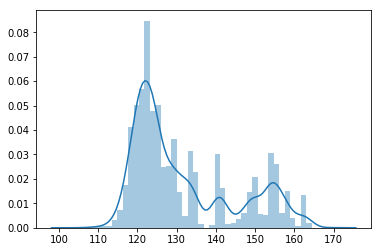

In [9]:
sns.distplot(tuple(df.price));

/Applications/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


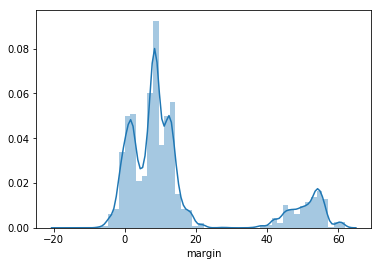

In [24]:
sns.distplot(df.margin)

In [16]:
print(len(df[df.margin > 35]))
print(len(df[df.area_name == 'vancouver']))


3370
3370


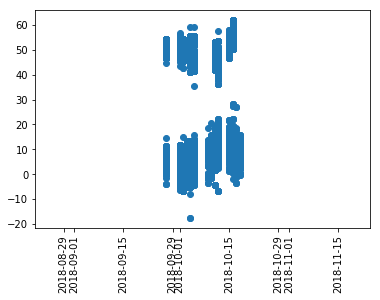

In [40]:
plt.scatter(x=df.date.dt.date.values, y=df.margin)
plt.xticks(rotation=90);

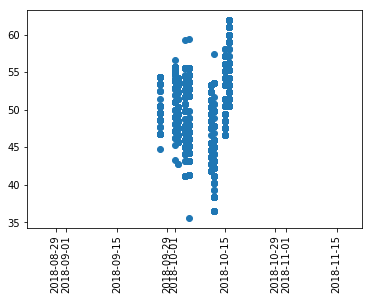

In [46]:
plt.scatter(x=df[df.margin > 35].date.dt.date.values, y=df[df.margin > 35].margin)
plt.xticks(rotation=90);

In [66]:
import sklearn as sk
from sklearn.cluster import KMeans
import numpy as np

In [94]:
geometry = df[['lat', 'lng']]

In [95]:
geometry.head()

,lat,lng
0,51.073312,-114.062513
1,51.022830,-114.140777
2,50.966572,-114.073015
3,51.073312,-114.062513
4,51.073312,-114.062513


In [96]:
X = np.array(geometry)

X = sk.preprocessing.scale(X)
kmeans = KMeans(n_clusters=6, random_state=0).fit(X)



In [97]:
kmeans.labels_

array([4, 4, 4, ..., 2, 2, 2], dtype=int32)

In [98]:
geometry['lable'] = list(kmeans.labels_)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [99]:
geometry.sample(10)

,lat,lng,lable
7501,49.280783,-123.027842,1
8681,49.218471,-123.076521,1
6317,53.455812,-113.428025,5
8032,49.330670,-123.072814,1
5415,53.546294,-113.479598,0
10601,48.424103,-123.344872,3
4770,53.469383,-113.587373,5
200,53.570368,-113.443382,0
10286,48.458009,-123.378813,3
5189,53.592519,-113.442473,0


TypeError: data type not understood

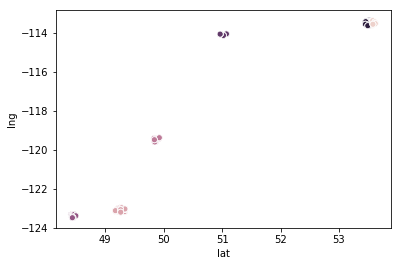

In [107]:
ax = sns.scatterplot(x=geometry.lat, y=geometry.lng, hue=(geometry.lable.astype('category')))

In [89]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
# read in topo data (on a regular lat/lon grid)
etopo = np.loadtxt('etopo20data.gz')
lons  = np.loadtxt('etopo20lons.gz')
lats  = np.loadtxt('etopo20lats.gz')
# create Basemap instance for Robinson projection.
m = Basemap(projection='robin',lon_0=0.5*(lons[0]+lons[-1]))
# compute map projection coordinates for lat/lon grid.
x, y = m(*np.meshgrid(lons,lats))
# make filled contour plot.
cs = m.contourf(x,y,etopo,30,cmap=plt.cm.jet)
m.drawcoastlines() # draw coastlines
m.drawmapboundary() # draw a line around the map region
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0]) # draw parallels
m.drawmeridians(np.arange(0.,420.,60.),labels=[0,0,0,1]) # draw meridians
plt.title('Robinson Projection') # add a title
plt.show()

OSError: etopo20data.gz not found.

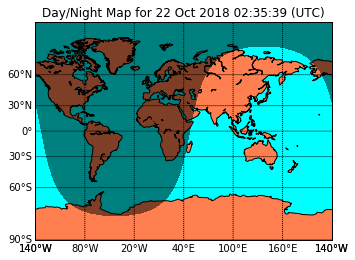

In [93]:
from datetime import datetime
# miller projection
map = Basemap(projection='mill',lon_0=180)
# plot coastlines, draw label meridians and parallels.
map.drawcoastlines()
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0])
map.drawmeridians(np.arange(map.lonmin,map.lonmax+30,60),labels=[0,0,0,1])
# fill continents 'coral' (with zorder=0), color wet areas 'aqua'
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='coral',lake_color='aqua')
# shade the night areas, with alpha transparency so the
# map shows through. Use current time in UTC.
date = datetime.utcnow()
CS=map.nightshade(date)
plt.title('Day/Night Map for %s (UTC)' % date.strftime("%d %b %Y %H:%M:%S"))
plt.show()

In [92]:
df.lat.min()

48.41253740000001